# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [11]:
# base ajustada (com variáveis dummy)
file_path = 'E:\Python\myenv\demo01_dummy.csv'
data_dummy = pd.read_csv(file_path)

missing = data_dummy.isnull().sum()

X = data_dummy.drop(columns=['mau'])
y = data_dummy['mau']

# 70% treinamento e 30% validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

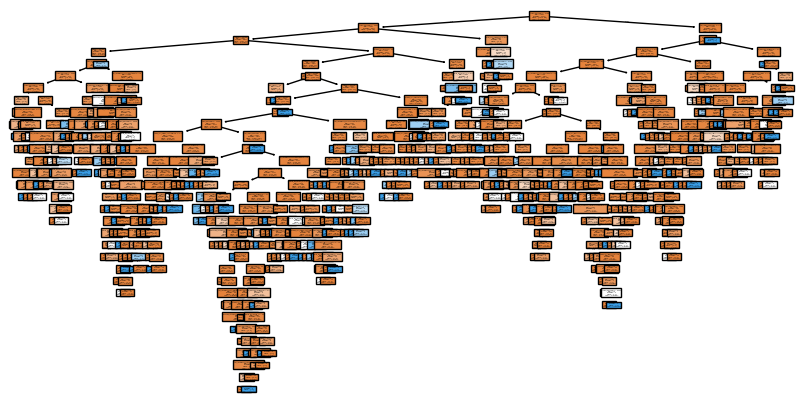

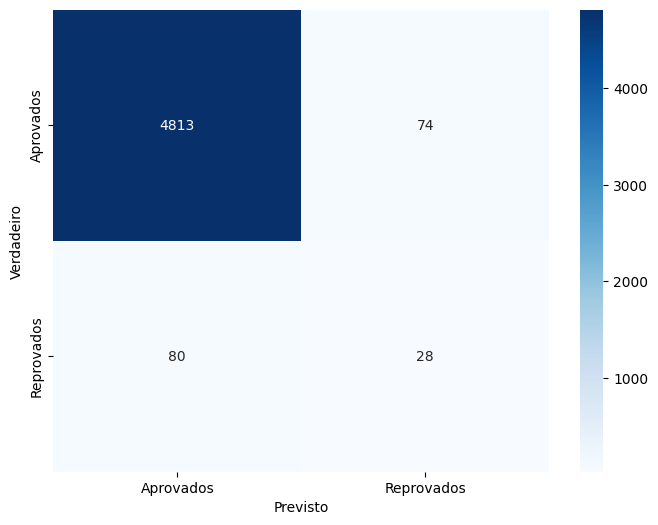

Acurácia na base de treinamento: 0.9912483912483913


In [12]:
# 1. objeto com a função da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# 2. treinando o modelo com os dados de treinamento
clf.fit(X_train, y_train)

# 3. visualizar a árvore
plt.figure(figsize=(10,5))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Aprovados', 'Reprovados'])
plt.show()

# 4. visualização da matriz de classificação
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# 5. acurácia na base de treinamento
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia na base de treinamento: {train_accuracy}')


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

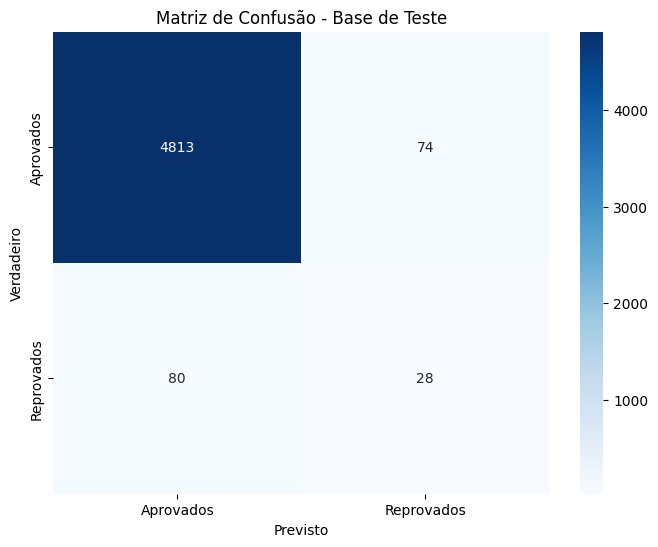

Acurácia na base de teste: 0.9691691691691692
Acurácia na base de treinamento: 0.9912483912483913


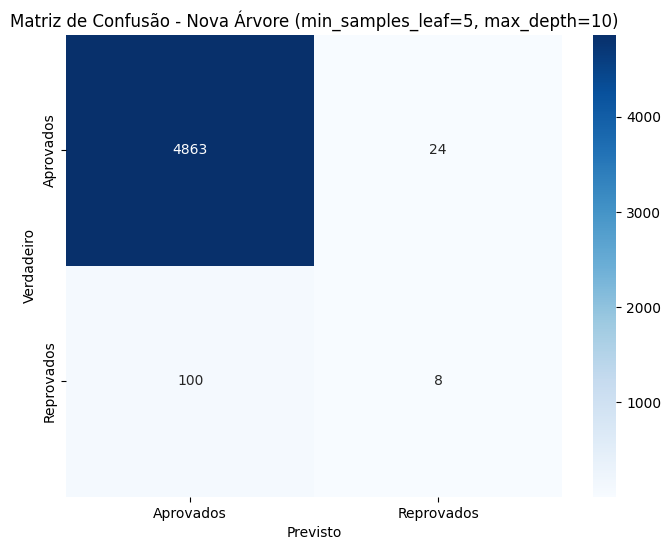

Proporção de proponentes classificados como "maus": 0.006406406406406407
Acurácia classificando todos os contratos como "bons": 0.9783783783783784


In [13]:
# 1. classificando a base de teste de acordo com a árvore treinada no item 2
y_pred = clf.predict(X_test)

# 2. visualização da matriz de confusão para a base de teste
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

# 3. acurácia da base de teste vs acurácia da base de treinamento
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia na base de teste: {test_accuracy}')
print(f'Acurácia na base de treinamento: {train_accuracy}')

# 4. nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new.fit(X_train, y_train)

# nova matriz de classificação
y_pred_new = clf_new.predict(X_test)
cm_new = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(8,6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Nova Árvore (min_samples_leaf=5, max_depth=10)')
plt.show()

# proponentes classificados como 'maus'
mau_proportion = (y_pred_new == 1).mean()
print(f'Proporção de proponentes classificados como "maus": {mau_proportion}')

# 5. acurácia se todos os contratos fossem classificados como 'bons'
all_good_accuracy = (y_test == 0).mean()
print(f'Acurácia classificando todos os contratos como "bons": {all_good_accuracy}')
